In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
font_s = 15
font_w = "bold"
    
def plot_histogram(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,2000)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    sns.histplot(data=df, x=score, kde=True, bins=bin_range)
    plt.xticks([-0.55,0,1,2,3,5,10,20,31,40,61,100,300,1000,2000], fontsize = 12)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
    plt.title(f'reference: {reference}, query: {query}, window: {window}')
    plt.xlabel(score, fontsize = font_s)
    plt.ylabel('Count', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

In [3]:
reference = 'julius'
query = 'julius-2x'
window = '50000'
chromosome='chr6B'
path=f'/Volumes/quirozj/00_kmers/read_depth/01_IBS_output/{reference}/'
# path=f'/Volumes/quirozj/09_watseq/01_IBSpy_output/{reference}/'
path

'/Volumes/quirozj/00_kmers/read_depth/01_IBS_output/julius/'

In [4]:
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
# '/Volumes/quirozj/09_watseq/01_IBSpy_output'
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49303,43721,143,4345
1,chr1A,49969,99969,49246,46635,75,2282
2,chr1A,99938,149938,49930,46580,89,2410
3,chr1A,149907,199907,49636,44663,129,3398
4,chr1A,199876,249876,49706,42025,203,5662
...,...,...,...,...,...,...,...
288083,chrUn,226959198,227009198,36580,35914,32,663
288084,chrUn,227009167,227059167,36650,36373,23,461
288085,chrUn,227059136,227109136,36565,36040,15,384
288086,chrUn,227109105,227159105,36565,36120,23,259


## Observed k-mers

In [5]:
score = 'observed_kmers'

In [6]:
in_file['observed_kmers'] = in_file['observed_kmers']/in_file['total_kmers']*100
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49303,88.678174,143,4345
1,chr1A,49969,99969,49246,94.698047,75,2282
2,chr1A,99938,149938,49930,93.290607,89,2410
3,chr1A,149907,199907,49636,89.981062,129,3398
4,chr1A,199876,249876,49706,84.547137,203,5662
...,...,...,...,...,...,...,...
288083,chrUn,226959198,227009198,36580,98.179333,32,663
288084,chrUn,227009167,227059167,36650,99.244202,23,461
288085,chrUn,227059136,227109136,36565,98.564201,15,384
288086,chrUn,227109105,227159105,36565,98.782989,23,259


In [7]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/80),1)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
#     plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=8, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Observed k-mers (%)', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
#     plt.yticks(list(np.arange(98,100.22,0.44)), fontsize = 30) # best qt 14x
    plt.yticks([1.00,20.00,40.00,60.00,80.00,100.22], fontsize = 30)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,800,100)), fontsize = 30)
#     plt.ylim(98, 100.2)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

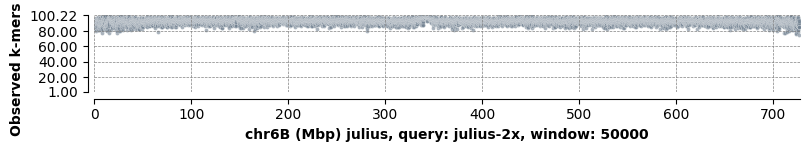

In [8]:
fig_size=(25, 4)

by_chr_df = in_file[in_file['seqname'].str.contains('chr6B')]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [9]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/80),1)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
#     plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=8, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Observed k-mers (%)', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks(list(np.arange(98,100.22,0.44)), fontsize = 30) # best qt 14x
#     plt.yticks([1.00,20.00,40.00,60.00,80.00,100.22], fontsize = 30)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
#     plt.xticks(list(range(0,800,100)), fontsize = 30)
    plt.ylim(98, 100.2)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

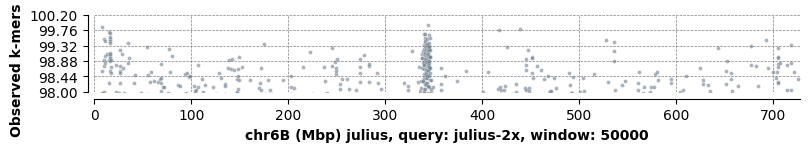

In [10]:
fig_size=(25, 4)

by_chr_df = in_file[in_file['seqname'].str.contains('chr6B')]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

## Variations

In [11]:
score = 'variations'
in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
in_file

,seqname,start,end,total_kmers,observed_kmers,variations,kmer_distance
0,chr1A,0,50000,49303,43721,143,4345
1,chr1A,49969,99969,49246,46635,75,2282
2,chr1A,99938,149938,49930,46580,89,2410
3,chr1A,149907,199907,49636,44663,129,3398
4,chr1A,199876,249876,49706,42025,203,5662
...,...,...,...,...,...,...,...
288083,chrUn,226959198,227009198,36580,35914,32,663
288084,chrUn,227009167,227059167,36650,36373,23,461
288085,chrUn,227059136,227109136,36565,36040,15,384
288086,chrUn,227109105,227159105,36565,36120,23,259


In [12]:
def plot_scatter_by_chr(df, fig_size, score, reference, query, window, chromosome):
    x_lim=int(max(df['end_scaled'])+1)
    fig_size = ((x_lim/80),1)
    
    font_s = 10
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.yscale('symlog', base=2)
    sns.scatterplot(data=df, x='end_scaled',y=score, s=8, alpha = 0.6, color='slategray')
    fig.axes[0].yaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'{chromosome}, reference: {reference}, query: {query}, window: {window}', fontweight=font_w)
    plt.ylabel('Variations', fontsize = font_s, fontweight=font_w)
    plt.xlabel(f'{chromosome} (Mbp) {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.yticks([0,2,10, 30, 120, 1000], fontsize = 1)
#     xticks = np.arange(0, x_lim , step=10)
#     plt.xticks(xticks, fontsize = font_s)
    plt.xticks(list(range(0,1000,100)), fontsize = 40)
#     plt.ylim(0,1500)
    plt.xlim(0, x_lim)
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    sns.despine(offset=5)

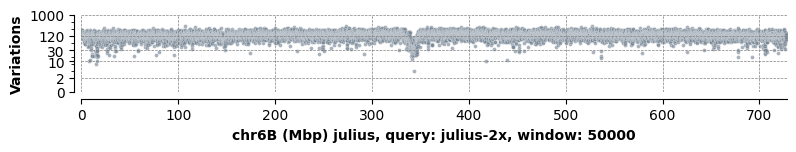

In [13]:
fig_size=(10, 2)
by_chr_df = in_file[in_file['seqname'].str.contains(chromosome)]
chromosomes = by_chr_df['seqname'].unique().tolist()

# chromosomes=['chr']
for chromosome in chromosomes:
#     in_file = pd.read_csv(path+f'{query}_{reference}_{window}.tsv.gz', delimiter='\t')
    individual_chr = in_file[in_file['seqname'].str.contains(chromosome)].copy()
    individual_chr['end_scaled'] = (individual_chr['end']/1000000).round(1)
    plot_scatter_by_chr(individual_chr, fig_size, score, reference, query, window, chromosome)

In [14]:
font_s = 10
font_w = "bold"

def plot_histogram_by_chr(df, fig_size, score, reference, query, window):
    fig=plt.figure(figsize=fig_size, facecolor='w')
    plt.ylim(0,6000)
    plt.xscale('symlog', base=2)
    bin_range = range(min(df[score]), max(df[score]))
    ax = sns.histplot(data=df, x=score, kde=False, bins=bin_range, hue="seqname", element="step",legend=False)
#     sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.2), title=None, fontsize = 8)
    
    plt.xticks([-0.55,0,1,2,3,5,10,20,30,50,120,350,1000,2000], fontsize = font_s)
    plt.xlim(-0.55,2000)
    plt.yticks(fontsize = font_s)
    fig.axes[0].xaxis.set_major_formatter(ScalarFormatter())
#     plt.title(f'reference: {reference}, query: {query}, window: {window}', fontsize = 9)
    plt.xlabel(score + f', {reference}, query: {query}, window: {window}', fontsize = font_s, fontweight=font_w)
    plt.ylabel('Frequency', fontsize = font_s, fontweight=font_w)
    sns.despine(offset=5)

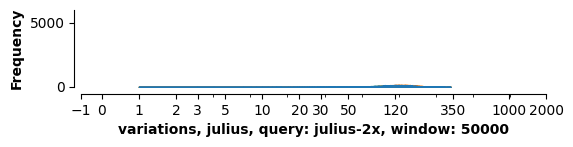

In [16]:
fig_size=(6, 1)
by_chr_df = in_file[in_file['seqname'].str.contains('6')]
plot_histogram_by_chr(by_chr_df, fig_size, score, reference, query, window)